In [201]:
import requests
from datetime import datetime, timedelta
import json
import pandas as pd

url = 'https://api.binance.com/api/v3/klines'
symbol = 'BTCUSDT'
interval = '1d'
period = datetime.now() - timedelta(450)

data_start = int(period.timestamp()*1000)
date_end = int(datetime.now().timestamp()*1000)

parametres = {
    'symbol' : symbol,
    'interval' : interval,
    'startTime' : data_start,
    'endTime' : date_end
}

res = json.loads(requests.get(url,params = parametres).text)
df= pd.DataFrame(res)
df.columns = ['datetime','open','high','low','close','volume','close_time','qav','num_trades','taker_base_vol','taker_quote_vol','ignore']
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')

df.head()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,2021-12-16,48864.98000000,49436.43000000,47511.00000000,47632.38000000,31949.86739000,1639699199999,1551200654.05274500,1023983,15281.92439000,742115283.57739880,0
1,2021-12-17,47632.38000000,47995.96000000,45456.00000000,46131.20000000,43104.48870000,1639785599999,2015966349.51613240,1261780,19846.77192000,928665863.58507440,0
2,2021-12-18,46133.83000000,47392.37000000,45500.00000000,46834.48000000,25020.05271000,1639871999999,1165205135.70084270,862066,12635.54707000,588649454.27256670,0
3,2021-12-19,46834.47000000,48300.01000000,46406.91000000,46681.23000000,29305.70665000,1639958399999,1384958598.36276990,874827,14646.77828000,692559814.22856370,0
4,2021-12-20,46681.24000000,47537.57000000,45558.85000000,46914.16000000,35848.50609000,1640044799999,1663363117.83045340,1076488,17666.32749000,819817570.66374300,0


In [202]:
df.drop(['close_time','qav','taker_base_vol','taker_quote_vol','ignore','num_trades'],axis=1,inplace=True)#Just dropping columns here!
df.head()

,datetime,open,high,low,close,volume
0,2021-12-16,48864.98000000,49436.43000000,47511.00000000,47632.38000000,31949.86739000
1,2021-12-17,47632.38000000,47995.96000000,45456.00000000,46131.20000000,43104.48870000
2,2021-12-18,46133.83000000,47392.37000000,45500.00000000,46834.48000000,25020.05271000
3,2021-12-19,46834.47000000,48300.01000000,46406.91000000,46681.23000000,29305.70665000
4,2021-12-20,46681.24000000,47537.57000000,45558.85000000,46914.16000000,35848.50609000


In [203]:
import ta 
df['Senkou Span A'] =ta.trend.ichimoku_a(df['high'], df['low'], window1=9, window2=26, visual=False, fillna=False)
df['Senkou Span B'] =ta.trend.ichimoku_b(df['high'], df['low'], window2=26, window3=52, visual=False, fillna=False)
df['Kijun-sen'] =ta.trend.ichimoku_base_line(df['high'], df['low'], window1=9, window2=26, visual=False, fillna=False)   #pandas.core.series.Series
df['Tenkan-sen'] =ta.trend.ichimoku_conversion_line(df['high'], df['low'], window1=9, window2=26, visual=False, fillna=False)  #pandas.core.series.Series
df['Lagging span']=df['close'].shift(-21) 

df.tail()

,datetime,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span
445,2023-03-06,22430.24000000,22602.19000000,22258.00000000,22410.00000000,203751.82957000,23143.0500,22569.025,23300.535,22985.565,None
446,2023-03-07,22409.41000000,22557.91000000,21927.00000000,22197.96000000,292519.80912000,23132.0175,22828.575,23300.535,22963.500,None
447,2023-03-08,22198.56000000,22287.00000000,21580.00000000,21705.44000000,301460.57272000,23045.2675,22828.575,23300.535,22790.000,None
448,2023-03-09,21704.37000000,21834.99000000,20042.72000000,20362.22000000,443658.28584000,22333.8600,22646.360,22646.360,22021.360,None
449,2023-03-10,20362.21000000,20367.78000000,19549.09000000,19917.17000000,438810.35744000,22036.2775,22399.545,22399.545,21673.010,None


In [204]:
#df['Lagging span'].shift(-26)
#df['Tenkan-sen'].shift(-26)
#df['Kijun-sen'].shift(-26)
#df['datetime'].shift(-26)
#df['open'].shift(-26)
#df['close'].shift(-26)
#df['high'].shift(-26)
#df['close'].shift(-26)
#df['volume'].shift(-26)
df['Senkou Span A'].shift(26)
df['Senkou Span B'].shift(26)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
445    20255.65
446    20294.00
447    20294.00
448    20294.00
449    20294.00
Name: Senkou Span B, Length: 450, dtype: float64

In [205]:
df.tail( )

,datetime,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span
445,2023-03-06,22430.24000000,22602.19000000,22258.00000000,22410.00000000,203751.82957000,23143.0500,22569.025,23300.535,22985.565,None
446,2023-03-07,22409.41000000,22557.91000000,21927.00000000,22197.96000000,292519.80912000,23132.0175,22828.575,23300.535,22963.500,None
447,2023-03-08,22198.56000000,22287.00000000,21580.00000000,21705.44000000,301460.57272000,23045.2675,22828.575,23300.535,22790.000,None
448,2023-03-09,21704.37000000,21834.99000000,20042.72000000,20362.22000000,443658.28584000,22333.8600,22646.360,22646.360,22021.360,None
449,2023-03-10,20362.21000000,20367.78000000,19549.09000000,19917.17000000,438810.35744000,22036.2775,22399.545,22399.545,21673.010,None


In [206]:
df.isnull().any()#We don't have any NaN values luckily

datetime         False
open             False
high             False
low              False
close            False
volume           False
Senkou Span A     True
Senkou Span B    False
Kijun-sen         True
Tenkan-sen        True
Lagging span      True
dtype: bool

In [207]:
df.fillna(True, inplace = True)

In [208]:
df.isnull().any()#We don't have any NaN values luckily

datetime         False
open             False
high             False
low              False
close            False
volume           False
Senkou Span A    False
Senkou Span B    False
Kijun-sen        False
Tenkan-sen       False
Lagging span     False
dtype: bool

In [209]:
df.shape #We can see that we have 1696 observations for bitcoin here 

(450, 11)

In [210]:
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df = df.set_index('datetime')
df.head()


,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span
datetime,,,,,,,,,,
2021-12-16,48864.98000000,49436.43000000,47511.00000000,47632.38000000,31949.86739000,True,48473.715,True,True,43082.31000000
2021-12-17,47632.38000000,47995.96000000,45456.00000000,46131.20000000,43104.48870000,True,47446.215,True,True,41566.48000000
2021-12-18,46133.83000000,47392.37000000,45500.00000000,46834.48000000,25020.05271000,True,47446.215,True,True,41679.74000000
2021-12-19,46834.47000000,48300.01000000,46406.91000000,46681.23000000,29305.70665000,True,47446.215,True,True,41864.62000000
2021-12-20,46681.24000000,47537.57000000,45558.85000000,46914.16000000,35848.50609000,True,47446.215,True,True,41822.49000000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 2021-12-16 to 2023-03-10
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           450 non-null    object 
 1   high           450 non-null    object 
 2   low            450 non-null    object 
 3   close          450 non-null    object 
 4   volume         450 non-null    object 
 5   Senkou Span A  450 non-null    object 
 6   Senkou Span B  450 non-null    float64
 7   Kijun-sen      450 non-null    object 
 8   Tenkan-sen     450 non-null    object 
 9   Lagging span   450 non-null    object 
dtypes: float64(1), object(9)
memory usage: 38.7+ KB


In [212]:
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)

df['Senkou Span A'] = df['Senkou Span A'].astype(float)
df['Senkou Span B'] = df['Senkou Span B'].astype(float)
df['Kijun-sen'] = df['Kijun-sen'].astype(float)
df['Tenkan-sen'] = df['Tenkan-sen'].astype(float)
df['Lagging span'] = df['Lagging span'].astype(float)



In [213]:
df.head()

,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span
datetime,,,,,,,,,,
2021-12-16,48864.98,49436.43,47511.00,47632.38,31949.86739000,1.0,48473.715,1.0,1.0,43082.31
2021-12-17,47632.38,47995.96,45456.00,46131.20,43104.48870000,1.0,47446.215,1.0,1.0,41566.48
2021-12-18,46133.83,47392.37,45500.00,46834.48,25020.05271000,1.0,47446.215,1.0,1.0,41679.74
2021-12-19,46834.47,48300.01,46406.91,46681.23,29305.70665000,1.0,47446.215,1.0,1.0,41864.62
2021-12-20,46681.24,47537.57,45558.85,46914.16,35848.50609000,1.0,47446.215,1.0,1.0,41822.49


In [214]:
df = df.drop(df.index[:25])
df.head()

,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span
datetime,,,,,,,,,,
2022-01-10,41864.62,42248.50,39650.00,41822.49,50729.17019000,44844.500,45869.0,45869.0,43820.00,38466.90
2022-01-11,41822.49,43100.00,41268.93,42729.29,37296.43729000,44739.500,45869.0,45869.0,43610.00,38694.59
2022-01-12,42729.29,44322.00,42450.00,43902.66,33943.29280000,44736.385,45869.0,45869.0,43603.77,36896.36
2022-01-13,43902.65,44500.00,42311.22,42560.11,34910.87762000,44614.500,45869.0,45869.0,43360.00,37311.61
2022-01-14,42558.35,43448.78,41725.95,43059.96,32640.88292000,43972.000,45869.0,45869.0,42075.00,41574.25


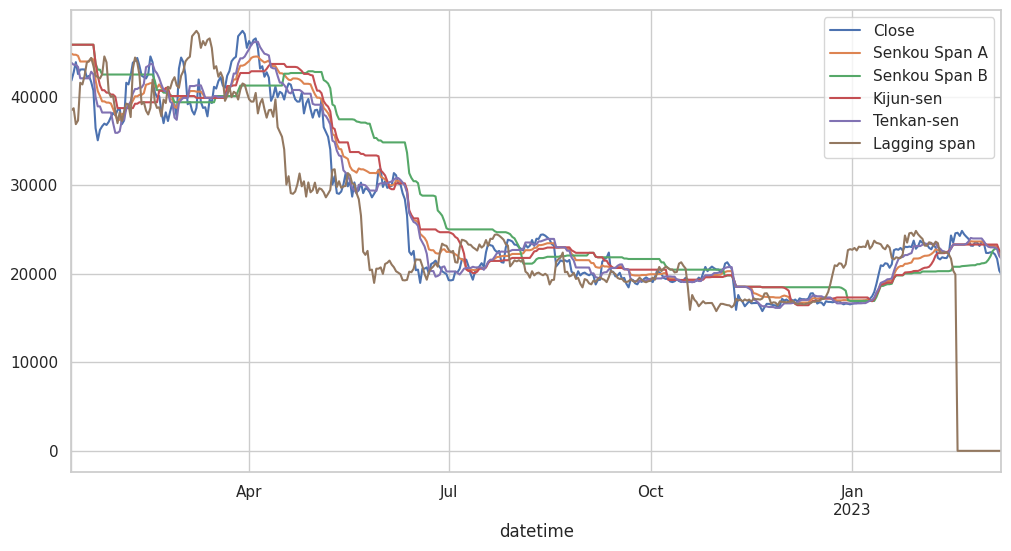

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('whitegrid')

import ta 
df['close'].plot(figsize=(12,6),label='Close')
df['Senkou Span A'].plot(figsize=(12,6),label='Senkou Span A')
df['Senkou Span B'].plot(figsize=(12,6),label='Senkou Span B')
df['Kijun-sen'].plot(figsize=(12,6),label='Kijun-sen')
df['Tenkan-sen'].plot(figsize=(12,6),label='Tenkan-sen')

df['Lagging span'].plot(figsize=(12,6),label='Lagging span')

plt.legend()

In [216]:
df['Price_After_Month']=df['close'].shift(-30) #This will be our label


In [217]:
#Preprocessing
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=df['Price_After_Month']

In [218]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [219]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 97.8791 %


In [220]:
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [221]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df=df.append(df1)
df.tail()

/tmp/ipykernel_1975/787462399.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df1)


,open,high,low,close,volume,Senkou Span A,Senkou Span B,Kijun-sen,Tenkan-sen,Lagging span,Price_After_Month,Forecast
2023-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21791.93140
2023-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21950.44005
2023-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21600.15850
2023-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20652.96790
2023-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20400.31610


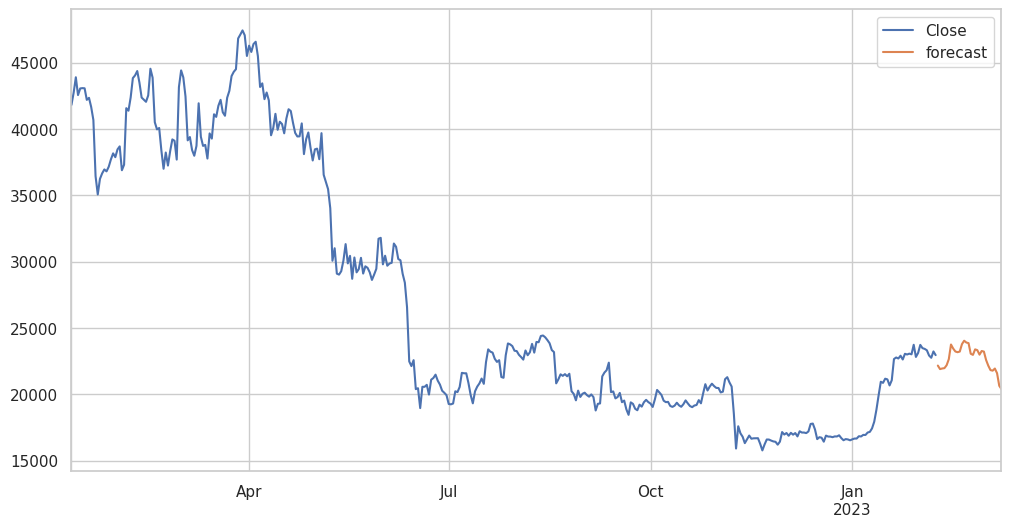

In [222]:
#Now we'll plot our forecast! 
df['close'].plot(figsize=(12,6),label='Close')
df['Forecast'].plot(label='forecast')
plt.legend()